# Exploring Splash Mountain Wait Times Compared to Parades & Fireworks

In [55]:
import pandas as pd ## call pandas functions using "pd"
import numpy as np  ## call numpy functions using "np"
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import Series
from datetime import datetime

#import meta data
meta = pd.read_csv("disney.csv")

#import magic kingdom rides (wait times)
splash = pd.read_csv("splash_mountain.csv")
seven_dwarfs = pd.read_csv("7_dwarfs_train.csv")
pirates = pd.read_csv('pirates_of_caribbean.csv')

In [2]:
# First five rows of meta, five columns, # start date 2012
meta.iloc[0:5, 0:10]

,DATE,WDW_TICKET_SEASON,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,SEASON,HOLIDAYPX,HOLIDAYM
0,01/01/2012,NaN,1,0,1,1,2012,CHRISTMAS PEAK,0,5
1,01/02/2012,NaN,2,1,1,1,2012,CHRISTMAS,2,5
2,01/03/2012,NaN,3,2,1,1,2012,CHRISTMAS,3,0
3,01/04/2012,NaN,4,3,1,1,2012,CHRISTMAS,4,0
4,01/05/2012,NaN,5,4,1,1,2012,CHRISTMAS,5,0


In [3]:
# Dropping sactmin from magic world rides, then dropping NaN from spostmin

# Drop rows where wait time is not available (-999)
pirates = pirates[pirates.SPOSTMIN > 0]
seven_dwarfs = seven_dwarfs[seven_dwarfs.SPOSTMIN > 0]
splash = splash[splash.SPOSTMIN > 0]

splash.head() #has posted minutes for each ride

,date,datetime,SPOSTMIN,SACTMIN
0,01/01/2012,2012-01-01 10:31:00,30.0,NaN
1,01/01/2012,2012-01-01 10:40:00,30.0,NaN
3,01/01/2012,2012-01-01 12:02:00,30.0,NaN
5,01/01/2012,2012-01-01 12:38:00,35.0,NaN
6,01/01/2012,2012-01-01 12:44:00,25.0,NaN


In [4]:
#Merging each ride with meta_data, using date as key
meta_splash = pd.merge(splash, meta, left_on="date", right_on="DATE").drop('DATE', axis = 1)

In [5]:
#skip run due to crashing for now
#meta_dwarfs = pd.merge(seven_dwarfs, meta, left_on="date", right_on="DATE").drop('DATE', axis = 1)
#meta_pirates = pd.merge(pirates, meta, left_on="date", right_on="DATE").drop('DATE', axis = 1)

In [6]:
#change NAs to 0 values
meta_splash = meta_splash.fillna(0)
#format date in a way that can be worked with
meta_splash['date'] = pd.to_datetime(meta_splash['date'])
meta_splash.head()

,date,datetime,SPOSTMIN,SACTMIN,WDW_TICKET_SEASON,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,...,HSFIREWKS,AKPRDDAY,AKPRDDT1,AKPRDDT2,AKPRDDN,AKFIREN,AKSHWNGT,AKSHWNT1,AKSHWNT2,AKSHWNN
0,2012-01-01,2012-01-01 10:31:00,30.0,0.0,0,1,0,1,1,2012,...,1,1,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0
1,2012-01-01,2012-01-01 10:40:00,30.0,0.0,0,1,0,1,1,2012,...,1,1,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0
2,2012-01-01,2012-01-01 12:02:00,30.0,0.0,0,1,0,1,1,2012,...,1,1,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0
3,2012-01-01,2012-01-01 12:38:00,35.0,0.0,0,1,0,1,1,2012,...,1,1,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0
4,2012-01-01,2012-01-01 12:44:00,25.0,0.0,0,1,0,1,1,2012,...,1,1,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0


In [7]:
#avg of posted wait times by day in meta_splash
sum_by_day = meta_splash.groupby('date')['SPOSTMIN'].mean()
#reset index to create dataframe columns
sum_by_day = sum_by_day.reset_index()
sum_by_day = pd.DataFrame(sum_by_day,columns=['date','SPOSTMIN'])
sum_by_day.head()

,date,SPOSTMIN
0,2012-01-01,37.727273
1,2012-01-02,43.750000
2,2012-01-03,5.000000
3,2012-01-04,17.142857
4,2012-01-05,41.153846


In [8]:
meta['DATE'] = pd.to_datetime(meta['DATE'])
#merge back with original meta set for daily weighted averages
meta_splash2 = pd.merge(sum_by_day, meta, left_on="date", right_on="DATE").drop('DATE', axis = 1)
meta_splash2.head()

,date,SPOSTMIN,WDW_TICKET_SEASON,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,SEASON,HOLIDAYPX,...,HSFIREWKS,AKPRDDAY,AKPRDDT1,AKPRDDT2,AKPRDDN,AKFIREN,AKSHWNGT,AKSHWNT1,AKSHWNT2,AKSHWNN
0,2012-01-01,37.727273,NaN,1,0,1,1,2012,CHRISTMAS PEAK,0,...,1,1,15:45,NaN,Mickey's Jingle Jungle Parade,NaN,0,NaN,NaN,NaN
1,2012-01-02,43.750000,NaN,2,1,1,1,2012,CHRISTMAS,2,...,1,1,15:45,NaN,Mickey's Jingle Jungle Parade,NaN,0,NaN,NaN,NaN
2,2012-01-03,5.000000,NaN,3,2,1,1,2012,CHRISTMAS,3,...,1,1,15:45,NaN,Mickey's Jammin' Jungle Parade,NaN,0,NaN,NaN,NaN
3,2012-01-04,17.142857,NaN,4,3,1,1,2012,CHRISTMAS,4,...,1,1,15:45,NaN,Mickey's Jammin' Jungle Parade,NaN,0,NaN,NaN,NaN
4,2012-01-05,41.153846,NaN,5,4,1,1,2012,CHRISTMAS,5,...,1,1,15:45,NaN,Mickey's Jammin' Jungle Parade,NaN,0,NaN,NaN,NaN


In [9]:
#fill na for new meta splash data
meta_splash2 = meta_splash2.fillna(0)
meta_splash2.head(100)

,date,SPOSTMIN,WDW_TICKET_SEASON,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,SEASON,HOLIDAYPX,...,HSFIREWKS,AKPRDDAY,AKPRDDT1,AKPRDDT2,AKPRDDN,AKFIREN,AKSHWNGT,AKSHWNT1,AKSHWNT2,AKSHWNN
0,2012-01-01,37.727273,0,1,0,1,1,2012,CHRISTMAS PEAK,0,...,1,1,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0
1,2012-01-02,43.750000,0,2,1,1,1,2012,CHRISTMAS,2,...,1,1,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0
2,2012-01-03,5.000000,0,3,2,1,1,2012,CHRISTMAS,3,...,1,1,15:45,0.0,Mickey's Jammin' Jungle Parade,0.0,0,0,0,0
3,2012-01-04,17.142857,0,4,3,1,1,2012,CHRISTMAS,4,...,1,1,15:45,0.0,Mickey's Jammin' Jungle Parade,0.0,0,0,0,0
4,2012-01-05,41.153846,0,5,4,1,1,2012,CHRISTMAS,5,...,1,1,15:45,0.0,Mickey's Jammin' Jungle Parade,0.0,0,0,0,0
5,2012-01-06,37.666667,0,6,5,1,1,2012,CHRISTMAS,6,...,1,1,15:45,0.0,Mickey's Jammin' Jungle Parade,0.0,0,0,0,0
6,2012-01-07,25.625000,0,7,6,1,1,2012,CHRISTMAS,7,...,1,1,15:45,0.0,Mickey's Jammin' Jungle Parade,0.0,0,0,0,0
7,2012-01-08,18.043478,0,1,7,2,1,2012,CHRISTMAS,8,...,1,1,15:45,0.0,Mickey's Jammin' Jungle Parade,0.0,0,0,0,0
8,2012-01-09,53.500000,0,2,8,2,1,2012,CHRISTMAS,8,...,1,1,15:45,0.0,Mickey's Jammin' Jungle Parade,0.0,0,0,0,0
9,2012-01-10,32.307692,0,3,9,2,1,2012,WINTER,7,...,1,1,15:45,0.0,Mickey's Jammin' Jungle Parade,0.0,0,0,0,0


## Wait Time vs Parade and Firework Times (HOURLY DATA)

See how wait times differ the hours before, during, and after a parade and firework time

In [10]:
#meta_splash2 = posted weighted times daily
meta_splash2.head(50)
#focusing on magic kingdom park's parades/fireworks
meta_splash2.MKPRDDAY.count()

2381

In [11]:
#dropping columns that are outside of magic kingdom in meta_splash2
meta_splash2 = meta_splash2.drop(['EPFIREWK','EPFIRET1','EPFIRET2','EPFIREN','HSPRDDAY','HSPRDDT1','HSPRDDN','HSFIREWK','HSFIRET1','HSFIRET2','HSFIREN','HSSHWNGT','HSSHWNT1','HSSHWNT2','HSSHWNN','HSFIREWKS','AKPRDDAY','AKPRDDT1','AKPRDDT2','AKPRDDN','AKFIREN','AKSHWNGT','AKSHWNT1','AKSHWNT2','AKSHWNN'], axis=1)

In [12]:
#data with parade/firework time for magic kingdom
meta_splash2.head()

,date,SPOSTMIN,WDW_TICKET_SEASON,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,SEASON,HOLIDAYPX,...,MKPRDDT2,MKPRDDN,MKPRDNGT,MKPRDNT1,MKPRDNT2,MKPRDNN,MKFIREWK,MKFIRET1,MKFIRET2,MKFIREN
0,2012-01-01,37.727273,0,1,0,1,1,2012,CHRISTMAS PEAK,0,...,0,Celebrate A Dream Come True Parade,2,20:00,22:00,Main Street Electrical Parade,1,21:00,0,Wishes Nighttime Spectacular
1,2012-01-02,43.750000,0,2,1,1,1,2012,CHRISTMAS,2,...,0,Celebrate A Dream Come True Parade,2,20:00,22:00,Main Street Electrical Parade,1,21:00,0,Wishes Nighttime Spectacular
2,2012-01-03,5.000000,0,3,2,1,1,2012,CHRISTMAS,3,...,0,Celebrate A Dream Come True Parade,2,20:00,22:00,Main Street Electrical Parade,1,21:00,0,Wishes Nighttime Spectacular
3,2012-01-04,17.142857,0,4,3,1,1,2012,CHRISTMAS,4,...,0,Celebrate A Dream Come True Parade,1,20:00,0,Main Street Electrical Parade,1,21:00,0,Wishes Nighttime Spectacular
4,2012-01-05,41.153846,0,5,4,1,1,2012,CHRISTMAS,5,...,0,Celebrate A Dream Come True Parade,1,20:00,0,Main Street Electrical Parade,1,21:00,0,Wishes Nighttime Spectacular


In [75]:
# change month and day to names of month and day ie: 1 to Sunday, 1 to January
meta_splash2['DAY'] = meta_splash2['date'].dt.weekday_name
meta_splash2['MONTH'] = meta_splash2['date'].dt.month_name()

meta_splash2.head()

,date,SPOSTMIN,WDW_TICKET_SEASON,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,SEASON,HOLIDAYPX,...,MKPRDNGT,MKPRDNT1,MKPRDNT2,MKPRDNN,MKFIREWK,MKFIRET1,MKFIRET2,MKFIREN,DAY,MONTH
0,2012-01-01,37.727273,0,1,0,1,1,2012,CHRISTMAS PEAK,0,...,2,8 pm,22:00,Main Street Electrical Parade,1,21:00,0,Wishes Nighttime Spectacular,Sunday,January
1,2012-01-02,43.750000,0,2,1,1,1,2012,CHRISTMAS,2,...,2,8 pm,22:00,Main Street Electrical Parade,1,21:00,0,Wishes Nighttime Spectacular,Monday,January
2,2012-01-03,5.000000,0,3,2,1,1,2012,CHRISTMAS,3,...,2,8 pm,22:00,Main Street Electrical Parade,1,21:00,0,Wishes Nighttime Spectacular,Tuesday,January
3,2012-01-04,17.142857,0,4,3,1,1,2012,CHRISTMAS,4,...,1,8 pm,0,Main Street Electrical Parade,1,21:00,0,Wishes Nighttime Spectacular,Wednesday,January
4,2012-01-05,41.153846,0,5,4,1,1,2012,CHRISTMAS,5,...,1,8 pm,0,Main Street Electrical Parade,1,21:00,0,Wishes Nighttime Spectacular,Thursday,January


In [80]:
#converting times
#day parade times
meta_splash2.loc[meta_splash2.MKPRDDT1 == '15:00', 'MKPRDNT1'] = '3:00 pm'
meta_splash2.loc[meta_splash2.MKPRDDT1 == '15:30', 'MKPRDNT1'] = '3:30 pm'
meta_splash2.loc[meta_splash2.MKPRDDT1 == '12:30', 'MKPRDNT1'] = '12:30 pm'
meta_splash2.loc[meta_splash2.MKPRDDT1 == '17:00', 'MKPRDNT1'] = '5:00 pm'
meta_splash2.loc[meta_splash2.MKPRDDT1 == '12:15', 'MKPRDNT1'] = '12:15 pm'
meta_splash2.loc[meta_splash2.MKPRDDT1 == '12:00', 'MKPRDNT1'] = '12:00 pm'
meta_splash2.loc[meta_splash2.MKPRDDT1 == '14:00', 'MKPRDNT1'] = '2:00 pm'
meta_splash2.loc[meta_splash2.MKPRDDT1 == '11:00', 'MKPRDNT1'] = '11:00 am'

#night parade times
meta_splash2.loc[meta_splash2.MKPRDNT2 == '20:00', 'MKPRDNT2'] = '8:00 pm'
meta_splash2.loc[meta_splash2.MKPRDNT2 == '19:00', 'MKPRDNT2'] = '7:00 pm'
meta_splash2.loc[meta_splash2.MKPRDNT2 == '21:00', 'MKPRDNT2'] = '9:00 pm'
meta_splash2.loc[meta_splash2.MKPRDNT2 == '22:00', 'MKPRDNT2'] = '10:00 pm'
meta_splash2.loc[meta_splash2.MKPRDNT2 == '20:15', 'MKPRDNT2'] = '8:15 pm'
meta_splash2.loc[meta_splash2.MKPRDNT2 == '23:00', 'MKPRDNT2'] = '11:00 pm'
meta_splash2.loc[meta_splash2.MKPRDNT2 == '22:15', 'MKPRDNT2'] = '10:15 pm'
meta_splash2.loc[meta_splash2.MKPRDNT2 == '18:30', 'MKPRDNT2'] = '6:30 pm'
meta_splash2.loc[meta_splash2.MKPRDNT2 == '20:35', 'MKPRDNT2'] = '8:35 pm'
meta_splash2.loc[meta_splash2.MKPRDNT2 == '21:30', 'MKPRDNT2'] = '9:30 pm'
meta_splash2.loc[meta_splash2.MKPRDNT2 == '20:30', 'MKPRDNT2'] = '8:30 pm'
meta_splash2.loc[meta_splash2.MKPRDNT2 == '21:15', 'MKPRDNT2'] = '9:15 pm'

#1st firework times 
meta_splash2.loc[meta_splash2.MKFIRET1 == '18:00', 'MKFIRET1'] = '6:00 pm'
meta_splash2.loc[meta_splash2.MKFIRET1 == '18:30', 'MKFIRET1'] = '6:30 pm'
meta_splash2.loc[meta_splash2.MKFIRET1 == '19:30', 'MKFIRET1'] = '7:30 pm'
meta_splash2.loc[meta_splash2.MKFIRET1 == '19:55', 'MKFIRET1'] = '7:55 pm'
meta_splash2.loc[meta_splash2.MKFIRET1 == '20:00', 'MKFIRET1'] = '8:15 pm'
meta_splash2.loc[meta_splash2.MKFIRET1 == '20:30', 'MKFIRET1'] = '8:30 pm'
meta_splash2.loc[meta_splash2.MKFIRET1 == '20:55', 'MKFIRET1'] = '8:55 pm'
meta_splash2.loc[meta_splash2.MKFIRET1 == '21:00', 'MKFIRET1'] = '9:00 pm'
meta_splash2.loc[meta_splash2.MKFIRET1 == '21:15', 'MKFIRET1'] = '9:15 pm'
meta_splash2.loc[meta_splash2.MKFIRET1 == '21:30', 'MKFIRET1'] = '9:30 pm'
meta_splash2.loc[meta_splash2.MKFIRET1 == '22:00', 'MKFIRET1'] = '10:00 pm'
meta_splash2.loc[meta_splash2.MKFIRET1 == '22:15', 'MKFIRET1'] = '10:15 pm'

#2nd firework times 
meta_splash2.loc[meta_splash2.MKFIRET2 == '22:00', 'MKFIRET2'] = '10:00 pm'
meta_splash2.loc[meta_splash2.MKFIRET2 == '23:50', 'MKFIRET2'] = '11:50 pm'

meta_splash2.head()

,date,SPOSTMIN,WDW_TICKET_SEASON,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,SEASON,HOLIDAYPX,...,MKPRDNGT,MKPRDNT1,MKPRDNT2,MKPRDNN,MKFIREWK,MKFIRET1,MKFIRET2,MKFIREN,DAY,MONTH
0,2012-01-01,37.727273,0,1,0,1,1,2012,CHRISTMAS PEAK,0,...,2,3:00 pm,10:00 pm,Main Street Electrical Parade,1,9:00 pm,0,Wishes Nighttime Spectacular,Sunday,January
1,2012-01-02,43.750000,0,2,1,1,1,2012,CHRISTMAS,2,...,2,3:00 pm,10:00 pm,Main Street Electrical Parade,1,9:00 pm,0,Wishes Nighttime Spectacular,Monday,January
2,2012-01-03,5.000000,0,3,2,1,1,2012,CHRISTMAS,3,...,2,3:00 pm,10:00 pm,Main Street Electrical Parade,1,9:00 pm,0,Wishes Nighttime Spectacular,Tuesday,January
3,2012-01-04,17.142857,0,4,3,1,1,2012,CHRISTMAS,4,...,1,3:00 pm,0,Main Street Electrical Parade,1,9:00 pm,0,Wishes Nighttime Spectacular,Wednesday,January
4,2012-01-05,41.153846,0,5,4,1,1,2012,CHRISTMAS,5,...,1,3:00 pm,0,Main Street Electrical Parade,1,9:00 pm,0,Wishes Nighttime Spectacular,Thursday,January


In [81]:
#DAY TIME PARADES

#3 unique day parades: Celebrate A Dream Come True Parade
#Mickey's Once Upon a Christmastime Parade
#Disney Festival of Fantasy Parade

#separated each parade
dream = meta_splash2[meta_splash2.MKPRDDN == 'Celebrate A Dream Come True Parade']
xmastime = meta_splash2[meta_splash2.MKPRDDN == "Mickey's Once Upon a Christmastime Parad"]
fantasy = meta_splash2[meta_splash2.MKPRDDN == 'Disney Festival of Fantasy Parade']

#drop night time parades
dream = dream.drop(['MKPRDNGT','MKPRDNT1','MKPRDNT2','MKPRDNN','MKFIREWK','MKFIRET1','MKFIRET2','MKFIREN'], axis = 1)
xmastime = xmastime.drop(['MKPRDNGT','MKPRDNT1','MKPRDNT2','MKPRDNN','MKFIREWK','MKFIRET1','MKFIRET2','MKFIREN'], axis = 1)
fantasy = fantasy.drop(['MKPRDNGT','MKPRDNT1','MKPRDNT2','MKPRDNN','MKFIREWK','MKFIRET1','MKFIRET2','MKFIREN'], axis = 1)

#number of each parad in total by day
dream.count() #633 instances
xmastime.count() #74 instances...Parade is spelled wrong in dataset
fantasy.count() #1,673 instances
meta_splash2['MKPRDDAY'].count() # = 2381 total day time parades / day


dream.head()

,date,SPOSTMIN,WDW_TICKET_SEASON,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,SEASON,HOLIDAYPX,...,CapacityLostWGT_HS,CapacityLostWGT_AK,EP09CAPACITY,HS20CAPACITY,MKPRDDAY,MKPRDDT1,MKPRDDT2,MKPRDDN,DAY,MONTH
0,2012-01-01,37.727273,0,1,0,1,1,2012,CHRISTMAS PEAK,0,...,8916209,6931107,1600,1000,1,15:00,0,Celebrate A Dream Come True Parade,Sunday,January
1,2012-01-02,43.750000,0,2,1,1,1,2012,CHRISTMAS,2,...,8916209,6931107,1600,1000,1,15:00,0,Celebrate A Dream Come True Parade,Monday,January
2,2012-01-03,5.000000,0,3,2,1,1,2012,CHRISTMAS,3,...,8916209,6931107,1600,1000,1,15:00,0,Celebrate A Dream Come True Parade,Tuesday,January
3,2012-01-04,17.142857,0,4,3,1,1,2012,CHRISTMAS,4,...,8916209,6931107,1600,1000,1,15:00,0,Celebrate A Dream Come True Parade,Wednesday,January
4,2012-01-05,41.153846,0,5,4,1,1,2012,CHRISTMAS,5,...,8916209,6931107,1600,1000,1,15:00,0,Celebrate A Dream Come True Parade,Thursday,January


In [82]:
#aggregate parades by month
month_splash = meta_splash2.groupby(['MONTH'])['SPOSTMIN'].mean()
month_splash = month_splash.reset_index()
month_splash

,MONTH,SPOSTMIN
0,April,46.710143
1,August,46.546117
2,December,29.974987
3,February,36.623804
4,January,28.440102
5,July,52.756633
6,June,51.340613
7,March,49.761683
8,May,40.851204
9,November,25.806448


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

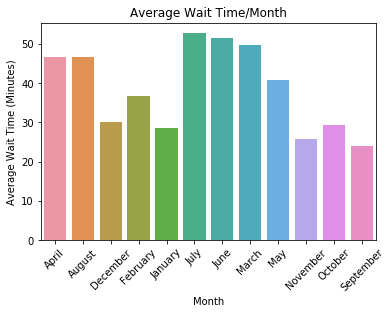

In [83]:
#Average wait time by month 
ax = sns.barplot(x="MONTH", y = "SPOSTMIN", data = month_splash)
ax.set(xlabel = 'Month', ylabel = 'Average Wait Time (Minutes)', title = 'Average Wait Time/Month')
plt.xticks(rotation=45)

In [84]:
#See how wait times differ the hours before, during, and after a parade
#avg wait times for splash mountain by hours 1st day parade begins
#hourly_wait = dream.groupby('MKPRDDT1')['SPOSTMIN'].mean()


#aggregate parades by month
month_splash = meta_splash2.groupby(['MONTH'])['SPOSTMIN'].mean()
month_splash = month_splash.reset_index()
month_splash

,MONTH,SPOSTMIN
0,April,46.710143
1,August,46.546117
2,December,29.974987
3,February,36.623804
4,January,28.440102
5,July,52.756633
6,June,51.340613
7,March,49.761683
8,May,40.851204
9,November,25.806448


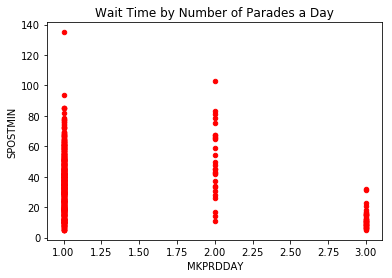

In [85]:
dream.plot(kind='scatter',x='MKPRDDAY',y='SPOSTMIN',color='red')
plt.title('Wait Time by Number of Parades a Day')
plt.show()

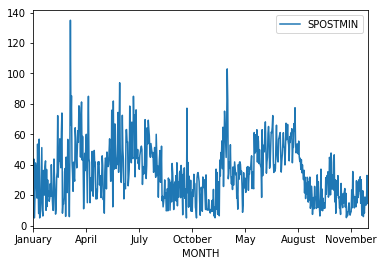

In [86]:
#time series plot of wait time compared to month
dream.plot.line(x='MONTH', y='SPOSTMIN')

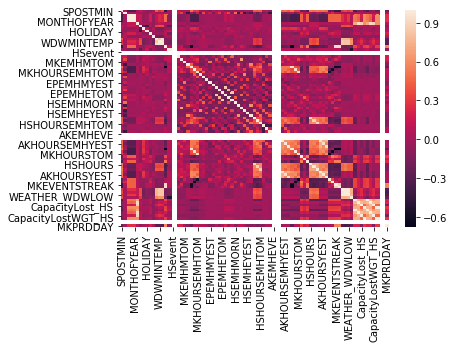

In [87]:
sns.heatmap(dream.corr()) #heat map correlation

In [88]:
pd.pivot_table(dream, values='SPOSTMIN', index=['MKPRDDT1'], columns='MONTHOFYEAR')

MONTHOFYEAR,1,2,3,4,5,6,7,8,9,10,11,12
MKPRDDT1,,,,,,,,,,,,
12:30,23.015780,NaN,52.140581,54.533360,47.486188,NaN,72.274845,NaN,NaN,NaN,NaN,NaN
15:00,27.566048,31.612636,47.072080,35.791923,36.424734,48.521213,49.586480,44.975264,20.650184,25.527568,18.268863,15.921806
15:30,6.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.119048,22.668478


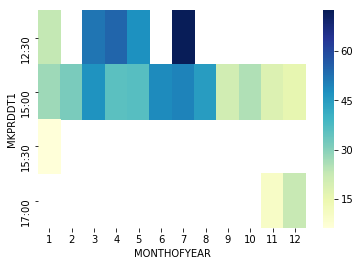

In [89]:
#heat map of wait times during each month and time of 1st parade
ax = pd.pivot_table(dream, values='SPOSTMIN', index=['MKPRDDT1'], columns='MONTHOFYEAR')
sns.heatmap(ax, cmap="YlGnBu")

[Text(0, 0.5, 'Average Posted Wait Time'), Text(0.5, 0, 'Time of Day')]

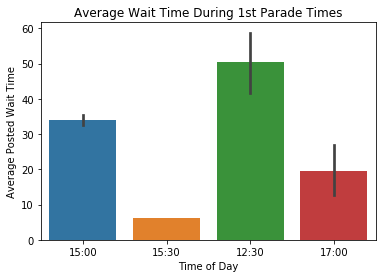

In [90]:
#wait time during 1st day parade times
ax = sns.barplot(x = "MKPRDDT1", y = "SPOSTMIN", data = dream)
ax.set_title("Average Wait Time During 1st Parade Times")
ax.set(xlabel='Time of Day', ylabel='Average Posted Wait Time')

[Text(0, 0.5, 'Average Posted Wait Time'), Text(0.5, 0, 'Time of Day')]

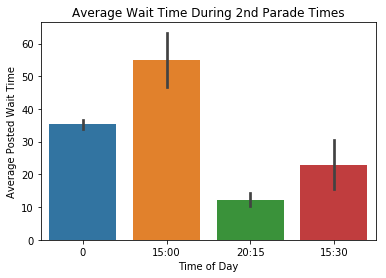

In [91]:
#wait time during 2nd day parade times
ax = sns.barplot(x = "MKPRDDT2", y = "SPOSTMIN", data = dream)
ax.set_title("Average Wait Time During 2nd Parade Times")
ax.set(xlabel='Time of Day', ylabel='Average Posted Wait Time')

[Text(33.0, 0.5, 'Month'), Text(0.5, 15.0, 'Time of Day')]

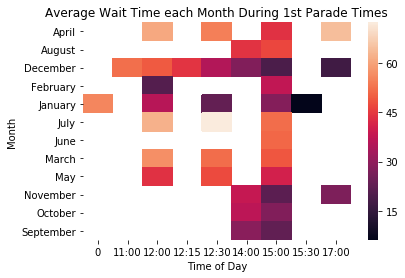

In [92]:
#aggregate by time and month of 1st parade
dream_month = meta_splash2.groupby(['MONTH','MKPRDDT1'])['SPOSTMIN'].mean().reset_index()
dream_month = dream_month.pivot("MONTH", "MKPRDDT1", "SPOSTMIN")
ax = sns.heatmap(dream_month)
ax.set_title("Average Wait Time each Month During 1st Parade Times")
ax.set(xlabel='Time of Day', ylabel='Month')

[Text(33.0, 0.5, 'Month'), Text(0.5, 15.0, 'Time of Day')]

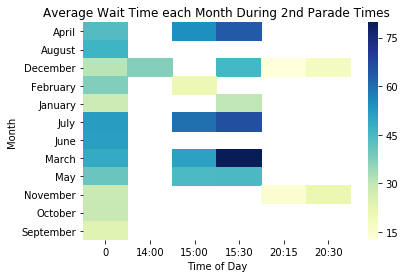

In [93]:
#aggregate by time and month of 2nd parade
dream_month2 = meta_splash2.groupby(['MONTH','MKPRDDT2'])['SPOSTMIN'].mean().reset_index()
dream_month2 = dream_month2.pivot("MONTH", "MKPRDDT2", "SPOSTMIN")
ax = sns.heatmap(dream_month2,cmap="YlGnBu")
ax.set_title("Average Wait Time each Month During 2nd Parade Times")
ax.set(xlabel='Time of Day', ylabel='Month')

In [22]:
#NIGHT TIME PARADES

#2 parades: Main Street Electrical Parade, Mickey's "Boo-to-You" Halloween Parade, 

In [23]:
#FIREWORKS
